## 保险业经营情况表2009-2018 数据展示

In [57]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import re
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)


### Data Sample
![A sample of data](https://gitee.com/jiangdawang/pic/raw/master/20211212202647.png)

#### 数据预处理

##### #读取数据

In [2]:
import os,sys
os.listdir()

['.ipynb_checkpoints',
 'data_handler.ipynb',
 'data_handler_julia.ipynb',
 'month_data.xlsx',
 'visualization.ipynb']

In [3]:

#data = pd.read_csv('../data/industry_data.csv')
#data.info()

In [4]:
data = pd.read_csv("/mnt/c/data_science/Insurance_report/data/09-21_total_without_note.csv",parse_dates=['date1'])
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date1                153 non-null    datetime64[ns]
 1   info                 153 non-null    object        
 2   原保险保费收入              153 non-null    float64       
 3   原保险保费收入_财产险          153 non-null    float64       
 4   原保险保费收入_人身险          153 non-null    float64       
 5   原保险保费收入_人身险_寿险       153 non-null    float64       
 6   原保险保费收入_人身险_健康险      153 non-null    float64       
 7   原保险保费收入_人身险_人身意外伤害险  153 non-null    float64       
 8   原保险赔付支出              153 non-null    float64       
 9   原保险赔付支出_财产险          153 non-null    float64       
 10  原保险赔付支出_人身险          153 non-null    float64       
 11  原保险赔付支出_人身险_寿险       153 non-null    float64       
 12  原保险赔付支出_人身险_健康险      153 non-null    float64       
 13  原保险赔付支出_人身险_人身意外伤害险  153 non-null  

date1              info     原保险保费收入  原保险保费收入_财产险  原保险保费收入_人身险  \
0 2009-01-01    2009年1月保险业经营数据  11476413.2    2973274.4    8503138.8   
1 2009-02-01  2009年1-2月保险业经营数据  21231670.6    4649354.7   16582315.9   
2 2009-03-01  2009年1-3月保险业经营数据  32767025.6    7185819.9   25581205.7   
3 2009-04-01  2009年1-4月保险业经营数据  41404593.3    9827050.2   31577543.1   
4 2009-05-01  2009年1-5月保险业经营数据  49504913.9   12089320.6   37415593.2   

   原保险保费收入_人身险_寿险  原保险保费收入_人身险_健康险  原保险保费收入_人身险_人身意外伤害险     原保险赔付支出  \
0       7834667.9         488045.6             180425.3   2837258.6   
1      15443030.8         815765.3             323519.7   5285888.7   
2      23589945.9        1403958.6             587301.1   8235800.2   
3      28972789.4        1827127.8             777625.9  10773711.4   
4      34211170.4        2252622.3             951800.6  13081729.5   

   原保险赔付支出_财产险  原保险赔付支出_人身险  原保险赔付支出_人身险_寿险  原保险赔付支出_人身险_健康险  \
0    1251807.8    1585450.8       1344880.2         183986.7   
1    2271490.1    3014398.7       2577771.2         338816.9   
2    3514472.2    4721328.1       4029203.3         540848.1   
3    4790724.2    5982987.2       5084159.2         696254.1   
4    5913100.9    7168628.5       6071939.2         847939.5   

   原保险赔付支出_人身险_人身意外伤害险     业务及管理费         银行存款           投资         资产总额  
0              56583.9   837728.0   81948010.7  223636240.8  338154395.5  
1              97810.6  1678057.0   88846207.8  220627736.0  342091505.5  
2             151276.7  2617023.4  100047101.3  221784969.6  354347298.0  
3             202574.0  3524507.8  103943128.7  220258335.0  355455087.2  
4             248749.8  4404294.2  105293958.2  224736995.1  361956016.4

##### 替换中文符号

In [7]:
columns = data.columns.to_list()
columns = [re.sub('_\d、','',x) for x in columns]
columns = [re.sub('_（\d）','',x) for x in columns]
columns
data.columns = columns

In [5]:
def create_nan_2015(x):
    tmp = {}
    for i in data.columns:
        if i == 'Year':
            tmp[i] = 2015
        elif i == 'Month':
            tmp[i] = f'1-{x}'
        elif i == 'date_time':
            tmp[i] = f'2011年1-{x}月'
        else:
            tmp[i] = np.nan
    return tmp

In [7]:
def create_nan_2011(x):
    tmp = {}
    for i in data.columns:
        if i == 'Year':
            tmp[i] = 2011
        elif i == 'Month':
            tmp[i] = f'1-{x}'
        elif i == 'date_time':
            tmp[i] = f'2011年1-{x}月'
        else:
            tmp[i] = np.nan
    return tmp

##### 正则读取月份年份

In [5]:
data['Year'] = data.date1.dt.year
data['Month'] = data.date1.dt.month
data.head()

date1              info     原保险保费收入  原保险保费收入_财产险  原保险保费收入_人身险  \
0 2009-01-01    2009年1月保险业经营数据  11476413.2    2973274.4    8503138.8   
1 2009-02-01  2009年1-2月保险业经营数据  21231670.6    4649354.7   16582315.9   
2 2009-03-01  2009年1-3月保险业经营数据  32767025.6    7185819.9   25581205.7   
3 2009-04-01  2009年1-4月保险业经营数据  41404593.3    9827050.2   31577543.1   
4 2009-05-01  2009年1-5月保险业经营数据  49504913.9   12089320.6   37415593.2   

   原保险保费收入_人身险_寿险  原保险保费收入_人身险_健康险  原保险保费收入_人身险_人身意外伤害险     原保险赔付支出  \
0       7834667.9         488045.6             180425.3   2837258.6   
1      15443030.8         815765.3             323519.7   5285888.7   
2      23589945.9        1403958.6             587301.1   8235800.2   
3      28972789.4        1827127.8             777625.9  10773711.4   
4      34211170.4        2252622.3             951800.6  13081729.5   

   原保险赔付支出_财产险  原保险赔付支出_人身险  原保险赔付支出_人身险_寿险  原保险赔付支出_人身险_健康险  \
0    1251807.8    1585450.8       1344880.2         183986.7   
1    2271490.1    3014398.7       2577771.2         338816.9   
2    3514472.2    4721328.1       4029203.3         540848.1   
3    4790724.2    5982987.2       5084159.2         696254.1   
4    5913100.9    7168628.5       6071939.2         847939.5   

   原保险赔付支出_人身险_人身意外伤害险     业务及管理费         银行存款           投资         资产总额  \
0              56583.9   837728.0   81948010.7  223636240.8  338154395.5   
1              97810.6  1678057.0   88846207.8  220627736.0  342091505.5   
2             151276.7  2617023.4  100047101.3  221784969.6  354347298.0   
3             202574.0  3524507.8  103943128.7  220258335.0  355455087.2   
4             248749.8  4404294.2  105293958.2  224736995.1  361956016.4   

   Year  Month  
0  2009      1  
1  2009      2  
2  2009      3  
3  2009      4  
4  2009      5

In [ ]:
#handle previous version
print(data.shape)
#data.drop('from_url',axis = 1,inplace=True)
data = data.drop_duplicates()
print(data.shape)
#data['date_time'] = data['info'].apply(lambda x: re.findall(r'.*(?=保险.*)',x)[0])
data['date1'] = data['date1'].replace({'2011年': '2011年1-12月',
                            '2012年': '2012年1-12月',
                            '2013年': '2013年1-12月',
                            '2014年': '2014年1-12月',
                            '2015年': '2015年1-12月',
                            '2016年': '2016年1-12月',
                            '2017年': '2017年1-12月',
                            '2011年2月':'2011年1-2月',
                            '2011年3月':'2011年1-3月',
                            '2011年6月':'2011年1-6月',
                            '2011年7月':'2011年1-7月'})

data['Year'] = data.date1.apply(lambda x: int(re.findall(r'\d{4}(?=年)',x)[0]))
data['Month'] = data.date1.apply(lambda x: re.findall(r'(?<=年).*(?=月)',x)[0])
#data.drop('info',inplace= True,axis = 1)
month_cat = ['1'] + [f'1-{i}' for i in range(2,13)]
#data = data.append(create_nan_2011(4),ignore_index=True)
#data = data.append(create_nan_2011(5),ignore_index=True)
#data = data.append(create_nan_2015(2),ignore_index=True)
#data = data.append(create_nan_2015(3),ignore_index=True)
data['Month'] = pd.Categorical(data['Month'],ordered = True,categories=month_cat)           
data = data.sort_values(by=['Year','Month'])

##### 读取所有的浮点型数据并interpolate缺失值

In [6]:
missing_date = pd.date_range('2009-01','2021-11',freq='MS').difference(data.date1)
missing_date

DatetimeIndex(['2015-02-01', '2015-03-01'], dtype='datetime64[ns]', freq=None)

In [7]:
#for i in missing_date 
missing_02_01 = {'date1': pd.to_datetime('2015-02-01'),
                'info': "2015年1-2月情况表",
                '原保险保费收入': np.nan,
                '原保险保费收入_财产险': np.nan,
                '原保险保费收入_人身险': np.nan,
                '原保险保费收入_人身险_寿险': np.nan,
                '原保险保费收入_人身险_健康险': np.nan,
                '原保险保费收入_人身险_人身意外伤害险': np.nan,
                '原保险赔付支出': np.nan,
                '原保险赔付支出_财产险':np.nan,
                '原保险赔付支出_人身险': np.nan,
                '原保险赔付支出_人身险_寿险': np.nan,
                '原保险赔付支出_人身险_健康险': np.nan,
                '原保险赔付支出_人身险_人身意外伤害险': np.nan,
                '业务及管理费': np.nan,
                '银行存款': np.nan,
                '投资': np.nan,
                '资产总额': np.nan,
                'Year': 2015,
                'Month': 2}
missing_03_01 = {'date1': pd.to_datetime('2015-03-01'),
                'info': "2015年1-3月情况表",
                '原保险保费收入': np.nan,
                '原保险保费收入_财产险': np.nan,
                '原保险保费收入_人身险': np.nan,
                '原保险保费收入_人身险_寿险': np.nan,
                '原保险保费收入_人身险_健康险': np.nan,
                '原保险保费收入_人身险_人身意外伤害险': np.nan,
                '原保险赔付支出': np.nan,
                '原保险赔付支出_财产险':np.nan,
                '原保险赔付支出_人身险': np.nan,
                '原保险赔付支出_人身险_寿险': np.nan,
                '原保险赔付支出_人身险_健康险': np.nan,
                '原保险赔付支出_人身险_人身意外伤害险': np.nan,
                '业务及管理费': np.nan,
                '银行存款': np.nan,
                '投资': np.nan,
                '资产总额': np.nan,
                'Year': 2015,
                'Month': 3}

data = data.append(missing_03_01,ignore_index=True)

data = data.append(missing_02_01,ignore_index=True)

data = data.sort_values('date1')
                



In [ ]:
data[data['Year']==2015]

In [8]:
numerical_col = data.select_dtypes(float).columns.tolist()


In [9]:
data[numerical_col] = data[numerical_col].interpolate(method='linear') 

In [10]:

def cal_each_month(group):
    #year = re.findall(r'\d{4}(?=年)',group.loc[0,'date_time'])[0]
    #print(year)
    vals = group.loc[:,numerical_col]
    vals_lag = vals.shift(1).fillna(0)
    rV = vals - vals_lag

    #index = range(1,13)
    #index = [f'{year}/{i}' for i in range(1,13)]
    #rV['dd'] = index
    #columns = numerical_col
    return vals - vals_lag

In [11]:
dd = data.groupby('Year').apply(cal_each_month)

In [14]:
dd['date'] = data.date1

In [12]:
dd.insert(0,'date',al)
dd['date'] = pd.to_datetime(dd['date'])

In [15]:
dd

原保险保费收入  原保险保费收入_财产险  原保险保费收入_人身险  原保险保费收入_人身险_寿险  原保险保费收入_人身险_健康险  \
0    11476413.2    2973274.4    8503138.8       7834667.9         488045.6   
1     9755257.4    1676080.3    8079177.1       7608362.9         327719.7   
2    11535355.0    2536465.2    8998889.8       8146915.1         588193.3   
3     8637567.7    2641230.3    5996337.4       5382843.5         423169.2   
4     8100320.6    2262270.4    5838050.1       5238381.0         425494.5   
..          ...          ...          ...             ...              ...   
148  28655300.0    8934000.0   19721100.0      13000500.0        5812600.0   
149  30600700.0    8839700.0   21761100.0      15018200.0        5852700.0   
150  34898000.0    9756300.0   25141800.0      16884500.0        6833900.0   
151  25389600.0    8504100.0   16885400.0      11523900.0        4496800.0   
152  25907500.0    9428900.0   16478600.0      11063600.0        4603600.0   

     原保险保费收入_人身险_人身意外伤害险     原保险赔付支出  原保险赔付支出_财产险  原保险赔付支出_人身险  \
0               180425.3   2837258.6    1251807.8    1585450.8   
1               143094.4   2448630.1    1019682.3    1428947.9   
2               263781.4   2949911.5    1242982.1    1706929.4   
3               190324.8   2537911.2    1276252.0    1261659.1   
4               174174.7   2308018.1    1122376.7    1185641.3   
..                   ...         ...          ...          ...   
148             908100.0  13452800.0    6327200.0    7125600.0   
149             890200.0  13818100.0    6940700.0    6877400.0   
150            1423400.0  13338600.0    6653600.0    6685000.0   
151             864700.0  10988600.0    5749800.0    5238800.0   
152             811400.0  13660500.0    7846600.0    5813900.0   

     原保险赔付支出_人身险_寿险  原保险赔付支出_人身险_健康险  原保险赔付支出_人身险_人身意外伤害险     业务及管理费  \
0         1344880.2         183986.7              56583.9   837728.0   
1         1232891.0         154830.2              41226.7   840329.0   
2         1451432.1         202031.2              53466.1   938966.4   
3         1054955.9         155406.0              51297.3   907484.4   
4          987780.0         151685.4              46175.8   879786.4   
..              ...              ...                  ...        ...   
148       2532000.0        4282700.0             310900.0  4060500.0   
149       2801500.0        3786900.0             289000.0  4152000.0   
150       3005500.0        3357500.0             321900.0  4124100.0   
151       2646900.0        2358400.0             233500.0  3907200.0   
152       2420600.0        3085800.0             317500.0  4432300.0   

           银行存款           投资         资产总额       date  
0    81948010.7  223636240.8  338154395.5 2009-01-01  
1     6898197.1   -3008504.8    3937110.0 2009-02-01  
2    11200893.5    1157233.6   12255792.5 2009-03-01  
3     3896027.4   -1526634.6    1107789.2 2009-04-01  
4     1350829.5    4478660.1    6500929.2 2009-05-01  
..          ...          ...          ...        ...  
148  -8349700.0    1687700.0   -5739500.0 2021-07-01  
149   3750000.0   15871500.0   20070500.0 2021-08-01  
150  -1507600.0   14845900.0   18479000.0 2021-09-01  
151  -2084800.0    9412400.0   12231200.0 2021-10-01  
152  -4799900.0   16327300.0   17694500.0 2021-11-01  

[155 rows x 17 columns]

In [13]:
dd = dd.sort_values('date',ascending=True)

In [13]:
len(data)

106

##### 寻找缺失的月份

In [38]:
data.groupby('Year')['原保险保费收入'].count()

Year
2009    12
2010    12
2011    12
2012    12
2013    12
2014    12
2015    12
2016    12
2017    12
2018    12
2019    12
2020    12
2021    11
Name: 原保险保费收入, dtype: int64

##### 找到年份数据

In [22]:
Date_Year = data['Month'] == 12
data[Date_Year].head()


date1               info      原保险保费收入  原保险保费收入_财产险  原保险保费收入_人身险  \
11 2009-12-01  2009年1-12月保险业经营数据  111372989.0   28758335.0   82614654.0   
23 2010-12-01  2010年1-12月保险业经营数据  145279714.6   38956424.7  106323289.8   
35 2011-12-01       2011年保险业经营数据  143392512.2   46178231.6   97214280.6   
47 2012-12-01      2012年保险业经营情况表  154879298.1   53309273.5  101570024.6   
59 2013-12-01      2013年保险业经营情况表  172222375.2   62122577.8  110099797.4   

    原保险保费收入_人身险_寿险  原保险保费收入_人身险_健康险  原保险保费收入_人身险_人身意外伤害险     原保险赔付支出  \
11      74574384.0        5739775.4            2300494.0  31254827.0   
23      96795093.4        6774658.5            2753537.9  32004291.6   
35      86955913.7        6917212.8            3341154.2  39293732.4   
47      89080569.8        8627607.1            3861847.7  47163184.6   
59      94251414.2       11234960.5            4613422.8  62129030.3   

    原保险赔付支出_财产险  原保险赔付支出_人身险  原保险赔付支出_人身险_寿险  原保险赔付支出_人身险_健康险  \
11   15757845.0   15496982.0      12687425.0        2170336.6   
23   17560273.5   14444018.1      11089892.0        2640219.9   
35   21869338.1   17424394.3      13009348.9        3596650.2   
47   28163316.4   18999868.2      15050143.9        2981707.5   
59   34391379.1   27737651.2      22531329.4        4111271.1   

    原保险赔付支出_人身险_人身意外伤害险      业务及管理费         银行存款           投资         资产总额  \
11             639220.3  12340587.0  105196832.0  268974324.0  406347543.0   
23             713906.2  15383514.7  139099714.3  321366512.9  504816086.5   
35             818395.3  18823799.5  177371710.3  377366746.6  601381032.4   
47             968016.9  21714623.7  234460040.3  450965776.2  735457303.9   
59            1095050.7  24595864.4  226409772.3  542324291.6  828869456.0   

    Year  Month  
11  2009     12  
23  2010     12  
35  2011     12  
47  2012     12  
59  2013     12

In [10]:
#data[Date_Year].date_time.tolist()

### 年份数据图表

#### 保险保费及支出变动 Line Chart

In [23]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=data[Date_Year].date1.tolist(),
                        y=data[Date_Year].原保险保费收入.tolist(),
                        mode='lines',
                        name='原保险保费收入'))
fig.add_trace(go.Scatter(x=data[Date_Year].date1.tolist(),
                y=data[Date_Year].原保险赔付支出.tolist(),
                mode='lines',
                name = '原保险赔付支出'))

fig.add_trace(go.Scatter(x=data[Date_Year].date1.tolist(),
                y=data[Date_Year].原保险保费收入_财产险.tolist(),
                mode='lines',
                name = '原保险保费收入_财产险'))
fig.add_trace(go.Scatter(x=data[Date_Year].date1.tolist(),
                y=data[Date_Year].原保险保费收入_人身险.tolist(),
                mode='lines',
                name = '原保险保费收入_人身险'))
fig.add_trace(go.Scatter(x=data[Date_Year].date1.tolist(),
                y=data[Date_Year].原保险赔付支出_财产险.tolist(),
                mode='lines',
                name = '原保险赔付支出_财产险'))
fig.add_trace(go.Scatter(x=data[Date_Year].date1.tolist(),
                y=data[Date_Year].原保险赔付支出_人身险.tolist(),
                mode='lines',
                name = '原保险赔付支出_人身险'))

                
fig.update_layout(title = '保险保费及支出变动', xaxis_title='Year',yaxis_title='费用/支出')
fig.show()

#### 保险保费及支出变动细分 Line Chart

In [24]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=data[Date_Year].date1.tolist(),
                y=data[Date_Year].原保险保费收入_人身险.tolist(),
                mode='lines',
                name = '原保险保费收入_人身险'))
fig.add_trace(go.Scatter(x=data[Date_Year].date1.tolist(),
                y=data[Date_Year].原保险赔付支出_人身险.tolist(),
                mode='lines',
                name = '原保险赔付支出_人身险'))
fig.add_trace(go.Scatter(x=data[Date_Year].date1.tolist(),
                y=data[Date_Year].原保险保费收入_人身险_寿险.tolist(),
                mode='lines',
                name = '原保险保费收入_人身险_寿险'))

fig.add_trace(go.Scatter(x=data[Date_Year].date1.tolist(),
                y=data[Date_Year].原保险赔付支出_人身险_寿险.tolist(),
                mode='lines',
                name = '原保险赔付支出_人身险_寿险'))

fig.add_trace(go.Scatter(x=data[Date_Year].date1.tolist(),
                y=data[Date_Year].原保险保费收入_人身险_健康险.tolist(),
                mode='lines',
                name = '原保险保费收入_人身险_健康险'))
fig.add_trace(go.Scatter(x=data[Date_Year].date1.tolist(),
                y=data[Date_Year].原保险赔付支出_人身险_健康险.tolist(),
                mode='lines',
                name = '原保险赔付支出_人身险_健康险'))
fig.add_trace(go.Scatter(x=data[Date_Year].date1.tolist(),
                y=data[Date_Year].原保险保费收入_人身险_人身意外伤害险.tolist(),
                mode='lines',
                name = '原保险保费收入_人身险_人身意外伤害险'))

fig.add_trace(go.Scatter(x=data[Date_Year].date1.tolist(),

                y=data[Date_Year].原保险赔付支出_人身险_人身意外伤害险.tolist(),
                mode='lines',
                name = '原保险赔付支出_人身险_人身意外伤害险'))

fig.update_layout(title = '保险保费及支出变动细分', xaxis_title='Year',yaxis_title='费用/支出')
fig.show()


#### 原保险保费收入_财产险占比 Vs 原保险保费收入_人身险占比 Bar Chart

In [25]:
data_Year = data[Date_Year].copy()

In [26]:
data_Year['原保险保费收入_财产险占比'] = data_Year['原保险保费收入_财产险']/ data_Year['原保险保费收入']
data_Year['原保险保费收入_人身险占比'] = data_Year['原保险保费收入_人身险']/ data_Year['原保险保费收入']
data_Year['原保险赔付支出_财产险占比'] = data_Year['原保险赔付支出_财产险']/ data_Year['原保险赔付支出']
data_Year['原保险赔付支出_人身险占比'] = data_Year['原保险赔付支出_人身险']/ data_Year['原保险赔付支出']

In [27]:
dict(zip(range(0,12),range(2009,2021)))

{0: 2009,
 1: 2010,
 2: 2011,
 3: 2012,
 4: 2013,
 5: 2014,
 6: 2015,
 7: 2016,
 8: 2017,
 9: 2018,
 10: 2019,
 11: 2020}

Text(0.5, 1.0, 'Recent Year Property Insurance Vs Individual Insurance')

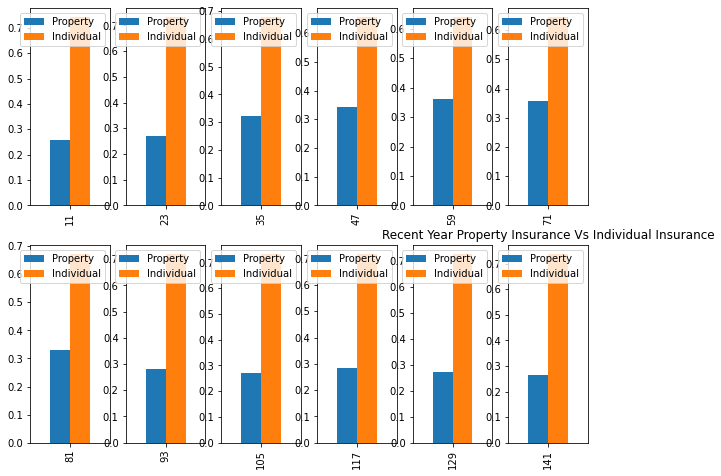

In [28]:
Year_dict = dict(zip(range(0,12),range(2009,2021)))
fig, axes = plt.subplots(2,6,figsize = (10,8))
for i in range(0,12):
    if i < 6:
        data_Year[data_Year['Year']==Year_dict[i]].loc[:,['原保险保费收入_财产险占比','原保险保费收入_人身险占比']].plot(kind='bar',ax = axes[0,i]);
        axes[0,i].legend(['Property','Individual'])
    else:
        data_Year[data_Year['Year']==Year_dict[i]].loc[:,['原保险保费收入_财产险占比','原保险保费收入_人身险占比']].plot(kind='bar',ax=axes[1,i-6]);
        axes[1,i-6].legend(['Property','Individual'])
plt.title('Recent Year Property Insurance Vs Individual Insurance')

In [29]:

from plotly.subplots import make_subplots


fig = make_subplots(
    rows=2, cols=6,
    column_widths=[0.5]*6,
    row_heights=[0.5]*2,
    specs=[[{"type": "bar"}, {"type": "bar"},{"type": "bar"},{"type": "bar"},{"type": "bar"},{"type": "bar"}],
           [{"type": "bar"},{"type": "bar"},{"type": "bar"},{"type": "bar"},{"type": "bar"} ,{"type": "bar"}]])
tra_ls = []
for i in range(6):
    x = ['财产险占比','人身险占比']
    y = data_Year[data_Year['Year']==Year_dict[i]].loc[:,['原保险保费收入_财产险占比','原保险保费收入_人身险占比']].squeeze(axis = 0).round(3).tolist()
    fig.add_trace(
    go.Bar(x=x,y=y, showlegend=True,text=y,name= Year_dict[i]),
    row=1, col =i+1
)

for i in range(6,12):
    x = ['财产险占比','人身险占比']
    y = data_Year[data_Year['Year']==Year_dict[i]].loc[:,['原保险保费收入_财产险占比','原保险保费收入_人身险占比']].squeeze(axis = 0).round(3).tolist()
    fig.add_trace(
    go.Bar(x=x,y=y, showlegend=True,text=y,name=Year_dict[i]
        ),
    row=2, col = i-5
    )
fig.update_layout(title = '原保险保费收入_财产险占比 Vs 原保险保费收入_人身险占比')
fig.show()


In [30]:
from plotly.subplots import make_subplots


fig = make_subplots(
    rows=2, cols=6,
    column_widths=[0.5]*6,
    row_heights=[0.5]*2,
    specs=[[{"type": "bar"}, {"type": "bar"},{"type": "bar"},{"type": "bar"},{"type": "bar"},{"type": "bar"}],
           [{"type": "bar"},{"type": "bar"},{"type": "bar"},{"type": "bar"}, {"type": "bar"},{"type": "bar"}]])
tra_ls = []
for i in range(6):
    x = ['财产险占比','人身险占比']
    y = data_Year[data_Year['Year']==Year_dict[i]].loc[:,['原保险赔付支出_财产险占比','原保险赔付支出_人身险占比']].squeeze(axis = 0).round(3).tolist()
    fig.add_trace(
    go.Bar(x=x,y=y,text=y,showlegend=True,name= Year_dict[i]),
    row=1, col =i+1
)

for i in range(6,12):
    x = ['财产险占比','人身险占比']
    y = data_Year[data_Year['Year']==Year_dict[i]].loc[:,['原保险赔付支出_财产险占比','原保险赔付支出_人身险占比']].squeeze(axis = 0).round(3).tolist()
    fig.add_trace(
    go.Bar(x=x,y=y, text=y,showlegend=True,name=Year_dict[i]
        ),
    row=2, col = i-5
    )
fig.update_layout(title = '原保险赔付支出_财产险占比 Vs 原保险赔付支出_人身险占比')
fig.show()


#### 原保险保费收入-人身险细分 Bar Chart

In [31]:
data_Year['收入_寿险占比'] = data_Year['原保险保费收入_人身险_寿险']/ data_Year['原保险保费收入_人身险']
data_Year['收入_健康险占比'] = data_Year['原保险保费收入_人身险_健康险']/ data_Year['原保险保费收入_人身险']
data_Year['收入_人身意外伤害险占比'] = data_Year['原保险保费收入_人身险_人身意外伤害险']/ data_Year['原保险保费收入_人身险']
data_Year['赔付_寿险占比'] = data_Year['原保险赔付支出_人身险_寿险']/ data_Year['原保险赔付支出_人身险']
data_Year['赔付_健康险占比'] = data_Year['原保险赔付支出_人身险_健康险']/ data_Year['原保险赔付支出_人身险']
data_Year['赔付_人身险占比'] = data_Year['原保险赔付支出_人身险_人身意外伤害险']/ data_Year['原保险赔付支出_人身险']

In [32]:
from plotly.subplots import make_subplots


fig = make_subplots(
    rows=2, cols=6,
    column_widths=[0.5]*6,
    row_heights=[0.5]*2,
    specs=[[{"type": "bar"}, {"type": "bar"},{"type": "bar"},{"type": "bar"},{"type": "bar"},{"type": "bar"}],
           [{"type": "bar"},{"type": "bar"},{"type": "bar"},{"type": "bar"}, {"type": "bar"},{"type": "bar"}]])
tra_ls = []
for i in range(6):
    x = ['寿险','人身险','人身意外伤害险']
    y = data_Year[data_Year['Year']==Year_dict[i]].loc[:,['收入_寿险占比','收入_健康险占比', '收入_人身意外伤害险占比']].squeeze(axis = 0).round(3).tolist()
    fig.add_trace(
    go.Bar(x=x,y=y,text=y ,showlegend=True,name= Year_dict[i]),
    row=1, col =i+1
)

for i in range(6,12):
    x = ['寿险','人身险','人身意外伤害险']
    y = data_Year[data_Year['Year']==Year_dict[i]].loc[:,['收入_寿险占比','收入_健康险占比', '收入_人身意外伤害险占比']].squeeze(axis = 0).round(3).tolist()
    fig.add_trace(
    go.Bar(x=x,y=y,text=y,showlegend=True,name=Year_dict[i]
        ),
    row=2, col = i-5
    )
fig.update_layout(title = '原保险保费收入-人身险')
fig.show()


#### 原保险赔付支出-人身险细分 Bar Chart

In [33]:
dic = {i:3 for i in ['收入_寿险占比','收入_健康险占比', '收入_人身意外伤害险占比', '赔付_寿险占比', '赔付_健康险占比', '赔付_人身险占比']}
d2 = data_Year.round(dic)


In [34]:
from plotly.subplots import make_subplots


fig = make_subplots(
    rows=2, cols=6,
    column_widths=[0.5]*6,
    row_heights=[0.5]*2,
    specs=[[{"type": "bar"}, {"type": "bar"},{"type": "bar"},{"type": "bar"},{"type": "bar"},{"type": "bar"}],
           [{"type": "bar"},{"type": "bar"},{"type": "bar"},{"type": "bar"}, {"type": "bar"},{"type": "bar"}]])

for i in range(6):
    x = ['寿险','人身险','人身意外伤害险']
    y = d2[d2['Year']==Year_dict[i]].loc[:,['赔付_寿险占比', '赔付_健康险占比', '赔付_人身险占比']].squeeze(axis = 0).tolist()
    fig.add_trace(
    go.Bar(x=x,y=y, showlegend=True,text=y,name= Year_dict[i]),
    row=1, col =i+1
)

for i in range(6,12):
    x = ['寿险','人身险','人身意外伤害险']
    y = d2[d2['Year']==Year_dict[i]].loc[:,['赔付_寿险占比', '赔付_健康险占比', '赔付_人身险占比']].squeeze(axis = 0).tolist()
    fig.add_trace(
    go.Bar(x=x,y=y, showlegend=True,text=y,name=Year_dict[i]
        ),
    row=2, col = i-5
    )
fig.update_layout(title = '原保险赔付支出-人身险')
fig.show()


In [36]:
dd.to_csv("month_data.csv")

In [29]:
#(data[data['Year']== 2009]['原保险保费收入'].reset_index(drop=True) - data[data['Year']== 2009]['原保险保费收入'].reset_index(drop=True).shift(1)).plot()

### 每月数据（对数据完整的年份）

#### 每月数据对比-->探究季节性

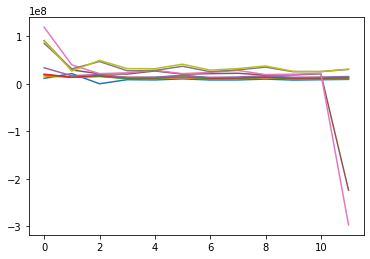

In [42]:
fig,ax = plt.subplots(1,1)
for i in range(2009,2021):
    if i not in [2011,2015,2018]:
        (data[data['Year']== i]['原保险保费收入'].reset_index(drop=True) - data[data['Year']== i]['原保险保费收入'].reset_index(drop=True).shift(1).fillna(0)).plot(ax=ax)

In [38]:
fig = go.Figure()
for i in range(2009,2021):
    if i not in [2015]: 
        x = list(range(1,13))
        y = (data[data['Year']== i]['原保险保费收入'].reset_index(drop=True) - data[data['Year']== i]['原保险保费收入'].reset_index(drop=True).shift(1).fillna(0)).tolist()
        fig.add_trace(go.Scatter(x=x,
                        y=y,
                        mode='lines',
                        name = f'{i} 年'))
fig.update_layout(title = '原保费收入（1-12月）', xaxis_title='月份',yaxis_title='收入')
fig.show()

In [39]:
fig = go.Figure()
for i in range(2009,2021):
    if i not in [2015]: 
        x = list(range(1,13))
        y = (data[data['Year']== i]['原保险赔付支出'].reset_index(drop=True) - data[data['Year']== i]['原保险赔付支出'].reset_index(drop=True).shift(1).fillna(0)).tolist()
        fig.add_trace(go.Scatter(x=x,
                        y=y,
                        mode='lines',
                        name = f'{i} 年'))
fig.update_layout(title = '原赔偿支出（1-12月）', xaxis_title='月份',yaxis_title='费用')
fig.show()

In [40]:
fig = make_subplots(
    rows=2, cols=1,
    column_widths=[0.8],
    row_heights=[1]*2,
    specs=[[{"type": "scatter"}],
           [{"type": "scatter"}]])

for i in range(2009,2021):
    if i not in [2015]: 
        x = list(range(1,13))
        y = (data[data['Year']== i]['原保险保费收入'].reset_index(drop=True) - data[data['Year']== i]['原保险保费收入'].reset_index(drop=True).shift(1).fillna(0)).tolist()
        fig.add_trace(go.Scatter(x=x,
                        y=y,
                        mode='lines',
                        name = f'{i} 年收入'),row=1, col = 1)
        #x = list(range(1,13))
        y = (data[data['Year']== i]['原保险赔付支出'].reset_index(drop=True) - data[data['Year']== i]['原保险赔付支出'].reset_index(drop=True).shift(1).fillna(0)).tolist()
        fig.add_trace(go.Scatter(x=x,
                        y=y,
                        mode='lines',
                        name = f'{i} 年赔偿'),row=2, col = 1)
fig.update_layout(title = '原赔偿支出/收入（1-12月）')
fig.show()

原保险保费收入  原保险保费收入_财产险  原保险保费收入_人身险  原保险保费收入_人身险_寿险  \
date                                                                
2009-01-01  28515180.84   6267249.25  22247931.60     18229582.85   
2009-02-01  68519191.78  11454663.02  57064528.75     50787454.05   
2009-03-01  21834240.41  10215849.49  11618390.92      8114247.06   
2009-04-01  20088153.48   8519367.55  11568785.93      8285150.00   
2009-05-01  19314506.78   7308527.70  12005979.08      8747082.26   
...                 ...          ...          ...             ...   
2017-07-01   8100320.57   2262270.46   5838050.11      5238381.00   
2017-08-01   8637567.71   2641230.23   5996337.48      5382843.45   
2017-09-01         0.00         0.00         0.00            0.00   
2017-10-01  21290612.36   4212545.55  17078066.81     15755278.03   
2017-11-01  11476413.23   2973274.39   8503138.84      7834667.90   

            原保险保费收入_人身险_健康险  原保险保费收入_人身险_人身意外伤害险  人身保险公司保户投资款新增交费  \
date                                                                
2009-01-01       3426596.51            591752.22       6571291.99   
2009-02-01       5323376.13            953698.58      18563165.10   
2009-03-01       2839168.92            664974.94       3562622.33   
2009-04-01       2634552.47            649083.46       4595615.51   
2009-05-01       2590382.70            668514.12       4240443.18   
...                     ...                  ...              ...   
2017-07-01        425494.45            174174.66              NaN   
2017-08-01        423169.18            190324.86              NaN   
2017-09-01             0.00                 0.00              NaN   
2017-10-01        915913.00            406875.77              NaN   
2017-11-01        488045.63            180425.31              NaN   

            人身保险公司投连险独立账户新增交费      原保险赔付支出  原保险赔付支出_财产险  原保险赔付支出_人身险  \
date                                                                   
2009-01-01          640352.80   9425589.20   3487974.39   5937614.80   
2009-02-01          869157.37  13131087.35   4753829.05   8377258.30   
2009-03-01          546535.65  10899470.02   6351780.65   4547689.37   
2009-04-01          185568.97  10061710.95   5078804.34   4982906.61   
2009-05-01          165568.18   7574094.70   3774005.48   3800089.22   
...                       ...          ...          ...          ...   
2017-07-01                NaN   2308018.05   1122376.76   1185641.29   
2017-08-01                NaN   2537911.19   1276252.03   1261659.17   
2017-09-01                NaN         0.00         0.00         0.00   
2017-10-01                NaN   5398541.64   2262664.39   3135877.25   
2017-11-01                NaN   2837258.58   1251807.76   1585450.82   

            原保险赔付支出_人身险_寿险  原保险赔付支出_人身险_健康险  原保险赔付支出_人身险_人身意外伤害险      业务及管理费  \
date                                                                           
2009-01-01      4742044.97       1018015.41            177554.44  2971902.27   
2009-02-01      6525964.78       1619936.17            231357.34  3179866.72   
2009-03-01      2612003.40       1693594.41            242091.57  5822095.75   
2009-04-01      3360538.07       1412272.14            210096.40  3648515.53   
2009-05-01      2643289.54        995690.08            161109.60  2984641.95   
...                    ...              ...                  ...         ...   
2017-07-01       987780.01        151685.45             46175.83   879786.37   
2017-08-01      1054955.93        155405.98             51297.26   907484.45   
2017-09-01            0.00             0.00                 0.00        0.00   
2017-10-01      2684323.04        356861.36             94692.86  1779295.33   
2017-11-01      1344880.23        183986.72             56583.86   837728.02   

                    银行存款            投资          资产总额  
date                                                  
2009-01-01  2.489948e+06 -4.561332e+06 -2.005889e+06  
2009-02-01  1.883404e+08  1.313660e+09  1.690528e+09  
2009-03-01 -2.803621e+

### 半年数据图表（1-6月 & 1-12月）数据

In [41]:
#data_half = data.query("Month in ['1-6','1-12']").reset_index(drop = True)
data_half = data[data['Month'].isin([6,12])]

#### 每年上半年下半年的保费差异 

In [42]:
data_half_diff = data_half.groupby('Year').apply(cal_each_month)
data_half_diff['date'] = data_half.date1

In [44]:
tmp = data_half_diff.set_index('date')[['原保险保费收入']].pct_change().fillna(0).reset_index()
fig = make_subplots(
    rows=2, cols=1,
    column_widths=[0.8],
    row_heights=[1]*2,
    specs=[[{"type": "scatter"}],
           [{"type": "scatter"}]])

fig.add_trace(go.Scatter(x = data_half_diff['date'].tolist(),
                         y =  data_half_diff['原保险保费收入'].pct_change().fillna(0).tolist(),
                         mode = 'lines', name = '原保险保费收入'),
                         row=1, col = 1)

fig.add_trace(go.Scatter(x = data_half_diff['date'].tolist(),
                         y =  data_half_diff['原保险赔付支出'].pct_change().fillna(0).tolist(),
                         mode = 'lines', name = '原保险赔付支出'),
                         row=1, col = 1)
#fig.update_layout(title = '原保险保费收入 Vs 原保险赔付支出前半年和后半年变化对比',xaxis_title='Year',yaxis_title= '百分比变化')     
fig.add_trace(go.Scatter(x = data_half_diff['date'].tolist(),
                         y = (tmp['原保险保费收入']+1).cumprod().tolist(),
                         mode = 'lines', name = '原保险保费收入总变化'),
                         row=2, col = 1)

fig.add_trace(go.Scatter(x = data_half_diff['date'].tolist(),
                         y = (data_half_diff['原保险赔付支出'].pct_change().fillna(0)+1).cumprod().tolist(),
                         mode = 'lines', name = '原保险赔付支出总变化'),
                         row=2, col = 1)

fig.update_layout(title = '原保险保费收入 Vs 原保险赔付支出前半年和后半年变化对比',
                  xaxis = dict(title='Year'),yaxis= dict(title='百分比变化'),
                  xaxis2 = dict(title='Year'),yaxis2= dict(title='总变化'))    

fig.show()


可以看出在前半年的保费收入和赔偿都要多于后半年，存在较强的周期性

### Using Time Series Analysis to investigate monthly data

In [82]:
from statsmodels.tsa.api import acf,pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller


In [45]:
dd.head()

原保险保费收入  原保险保费收入_财产险  原保险保费收入_人身险  原保险保费收入_人身险_寿险  原保险保费收入_人身险_健康险  \
0  11476413.2    2973274.4    8503138.8       7834667.9         488045.6   
1   9755257.4    1676080.3    8079177.1       7608362.9         327719.7   
2  11535355.0    2536465.2    8998889.8       8146915.1         588193.3   
3   8637567.7    2641230.3    5996337.4       5382843.5         423169.2   
4   8100320.6    2262270.4    5838050.1       5238381.0         425494.5   

   原保险保费收入_人身险_人身意外伤害险    原保险赔付支出  原保险赔付支出_财产险  原保险赔付支出_人身险  原保险赔付支出_人身险_寿险  \
0             180425.3  2837258.6    1251807.8    1585450.8       1344880.2   
1             143094.4  2448630.1    1019682.3    1428947.9       1232891.0   
2             263781.4  2949911.5    1242982.1    1706929.4       1451432.1   
3             190324.8  2537911.2    1276252.0    1261659.1       1054955.9   
4             174174.7  2308018.1    1122376.7    1185641.3        987780.0   

   原保险赔付支出_人身险_健康险  原保险赔付支出_人身险_人身意外伤害险    业务及管理费        银行存款           投资  \
0         183986.7              56583.9  837728.0  81948010.7  223636240.8   
1         154830.2              41226.7  840329.0   6898197.1   -3008504.8   
2         202031.2              53466.1  938966.4  11200893.5    1157233.6   
3         155406.0              51297.3  907484.4   3896027.4   -1526634.6   
4         151685.4              46175.8  879786.4   1350829.5    4478660.1   

          资产总额       date  
0  338154395.5 2009-01-01  
1    3937110.0 2009-02-01  
2   12255792.5 2009-03-01  
3    1107789.2 2009-04-01  
4    6500929.2 2009-05-01

In [71]:
origin_earning = dd.set_index('date')['原保险保费收入'].to_frame()
origin_earning.head()
origin_earning.rename(columns={'原保险保费收入':'total_earning'},inplace=True)

In [72]:
origin_earning['ma_2'] = origin_earning['total_earning'].rolling(window=2).mean()
origin_earning['ma_3'] = origin_earning['total_earning'].rolling(window=3).mean()
origin_earning['ma_12'] = origin_earning['total_earning'].rolling(window=12).mean()


<AxesSubplot:xlabel='date'>

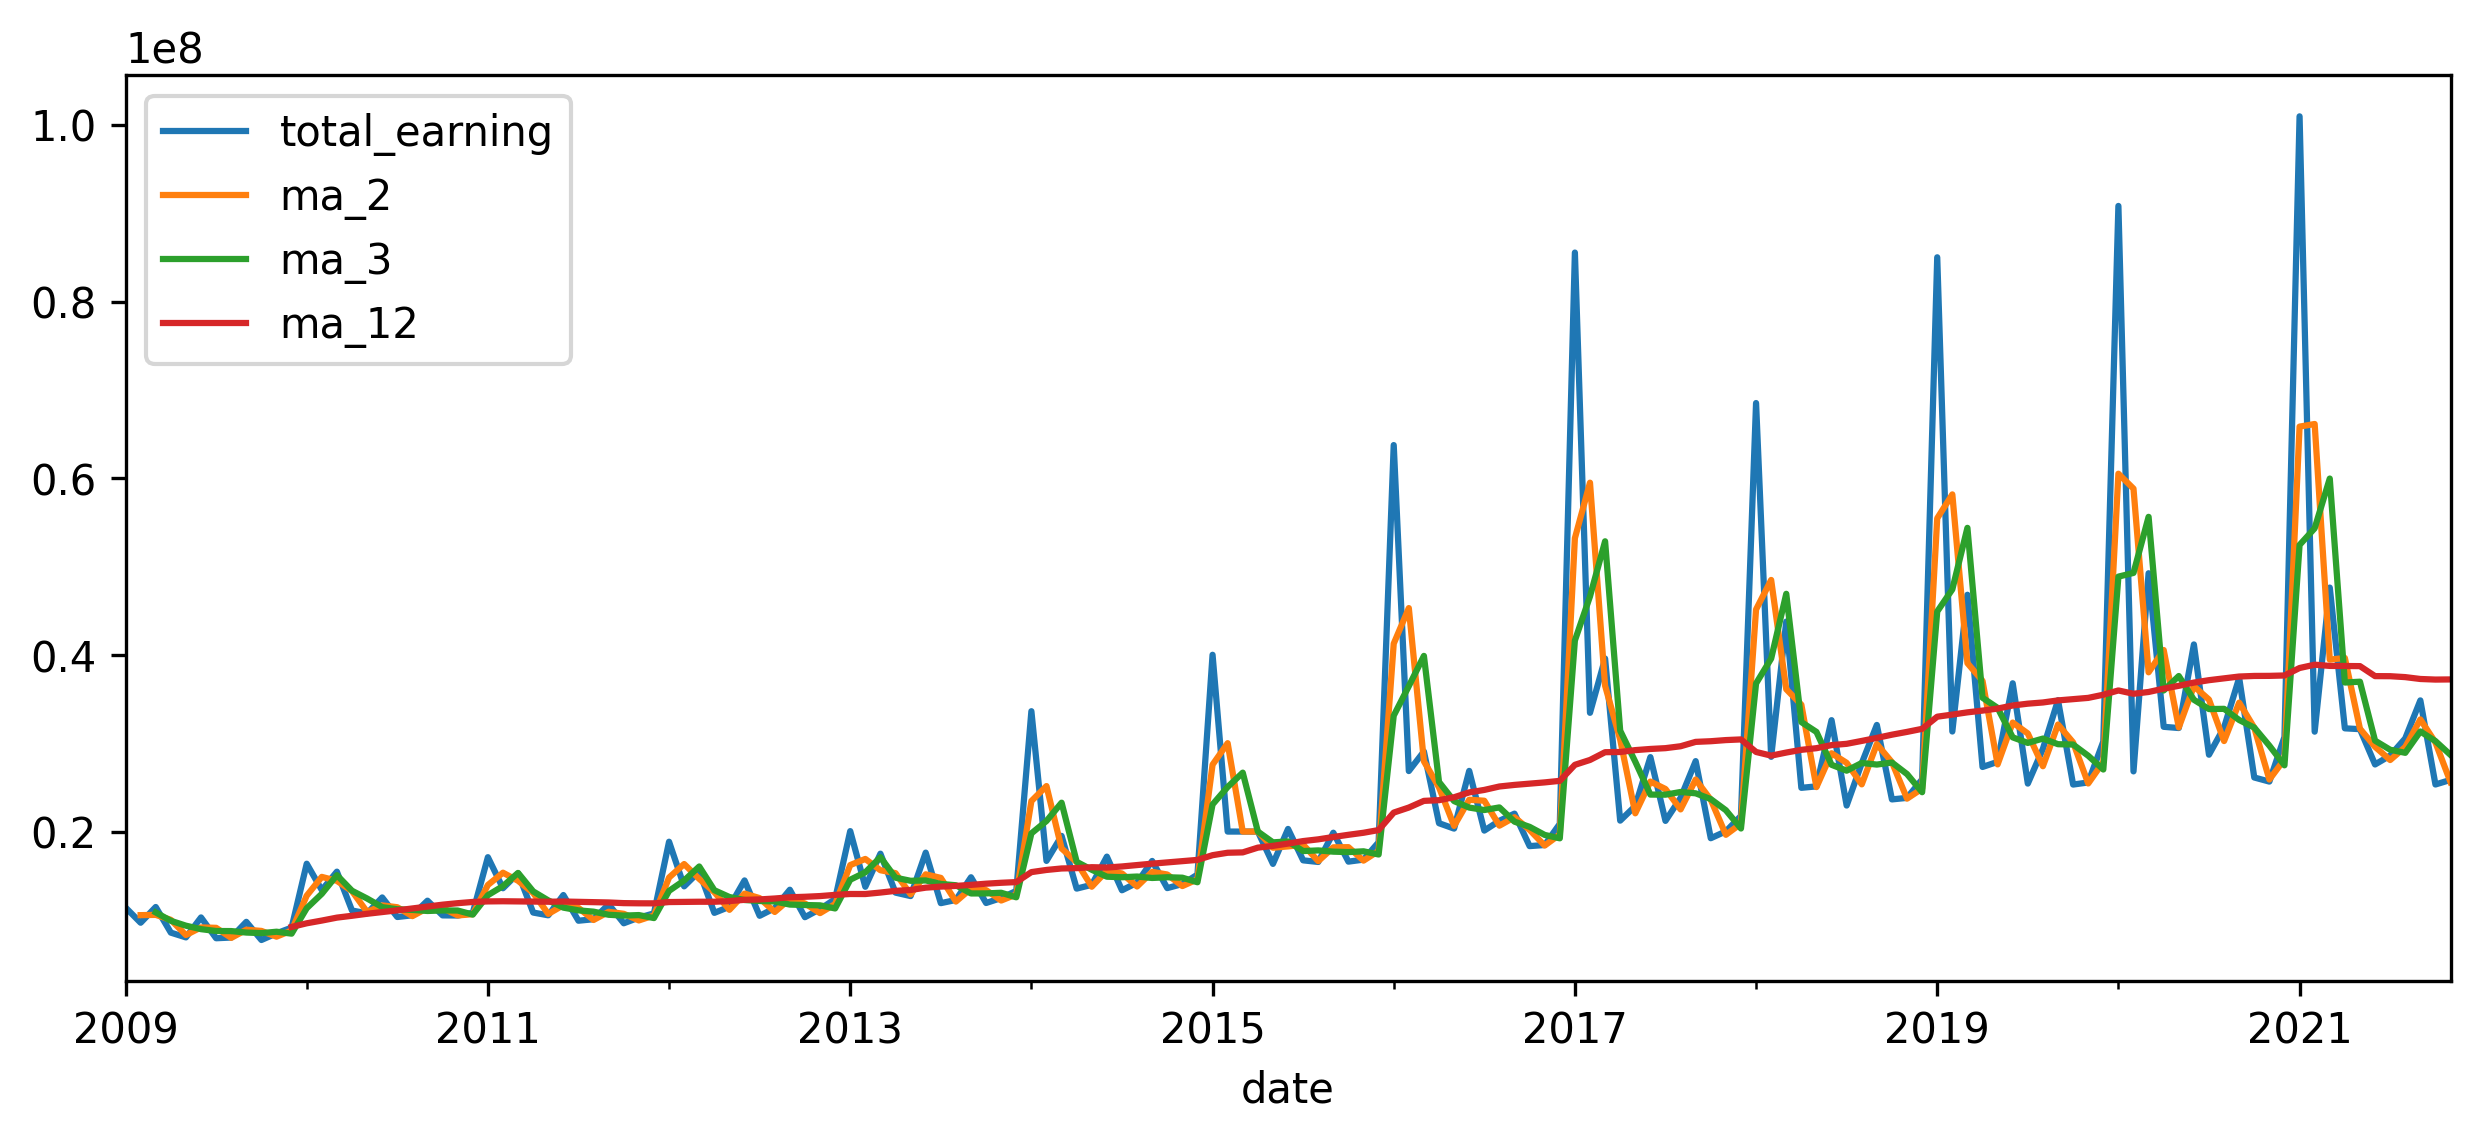

In [101]:
fig,ax=plt.subplots(figsize=(10,4),dpi=300)
origin_earning.plot(ax=ax)

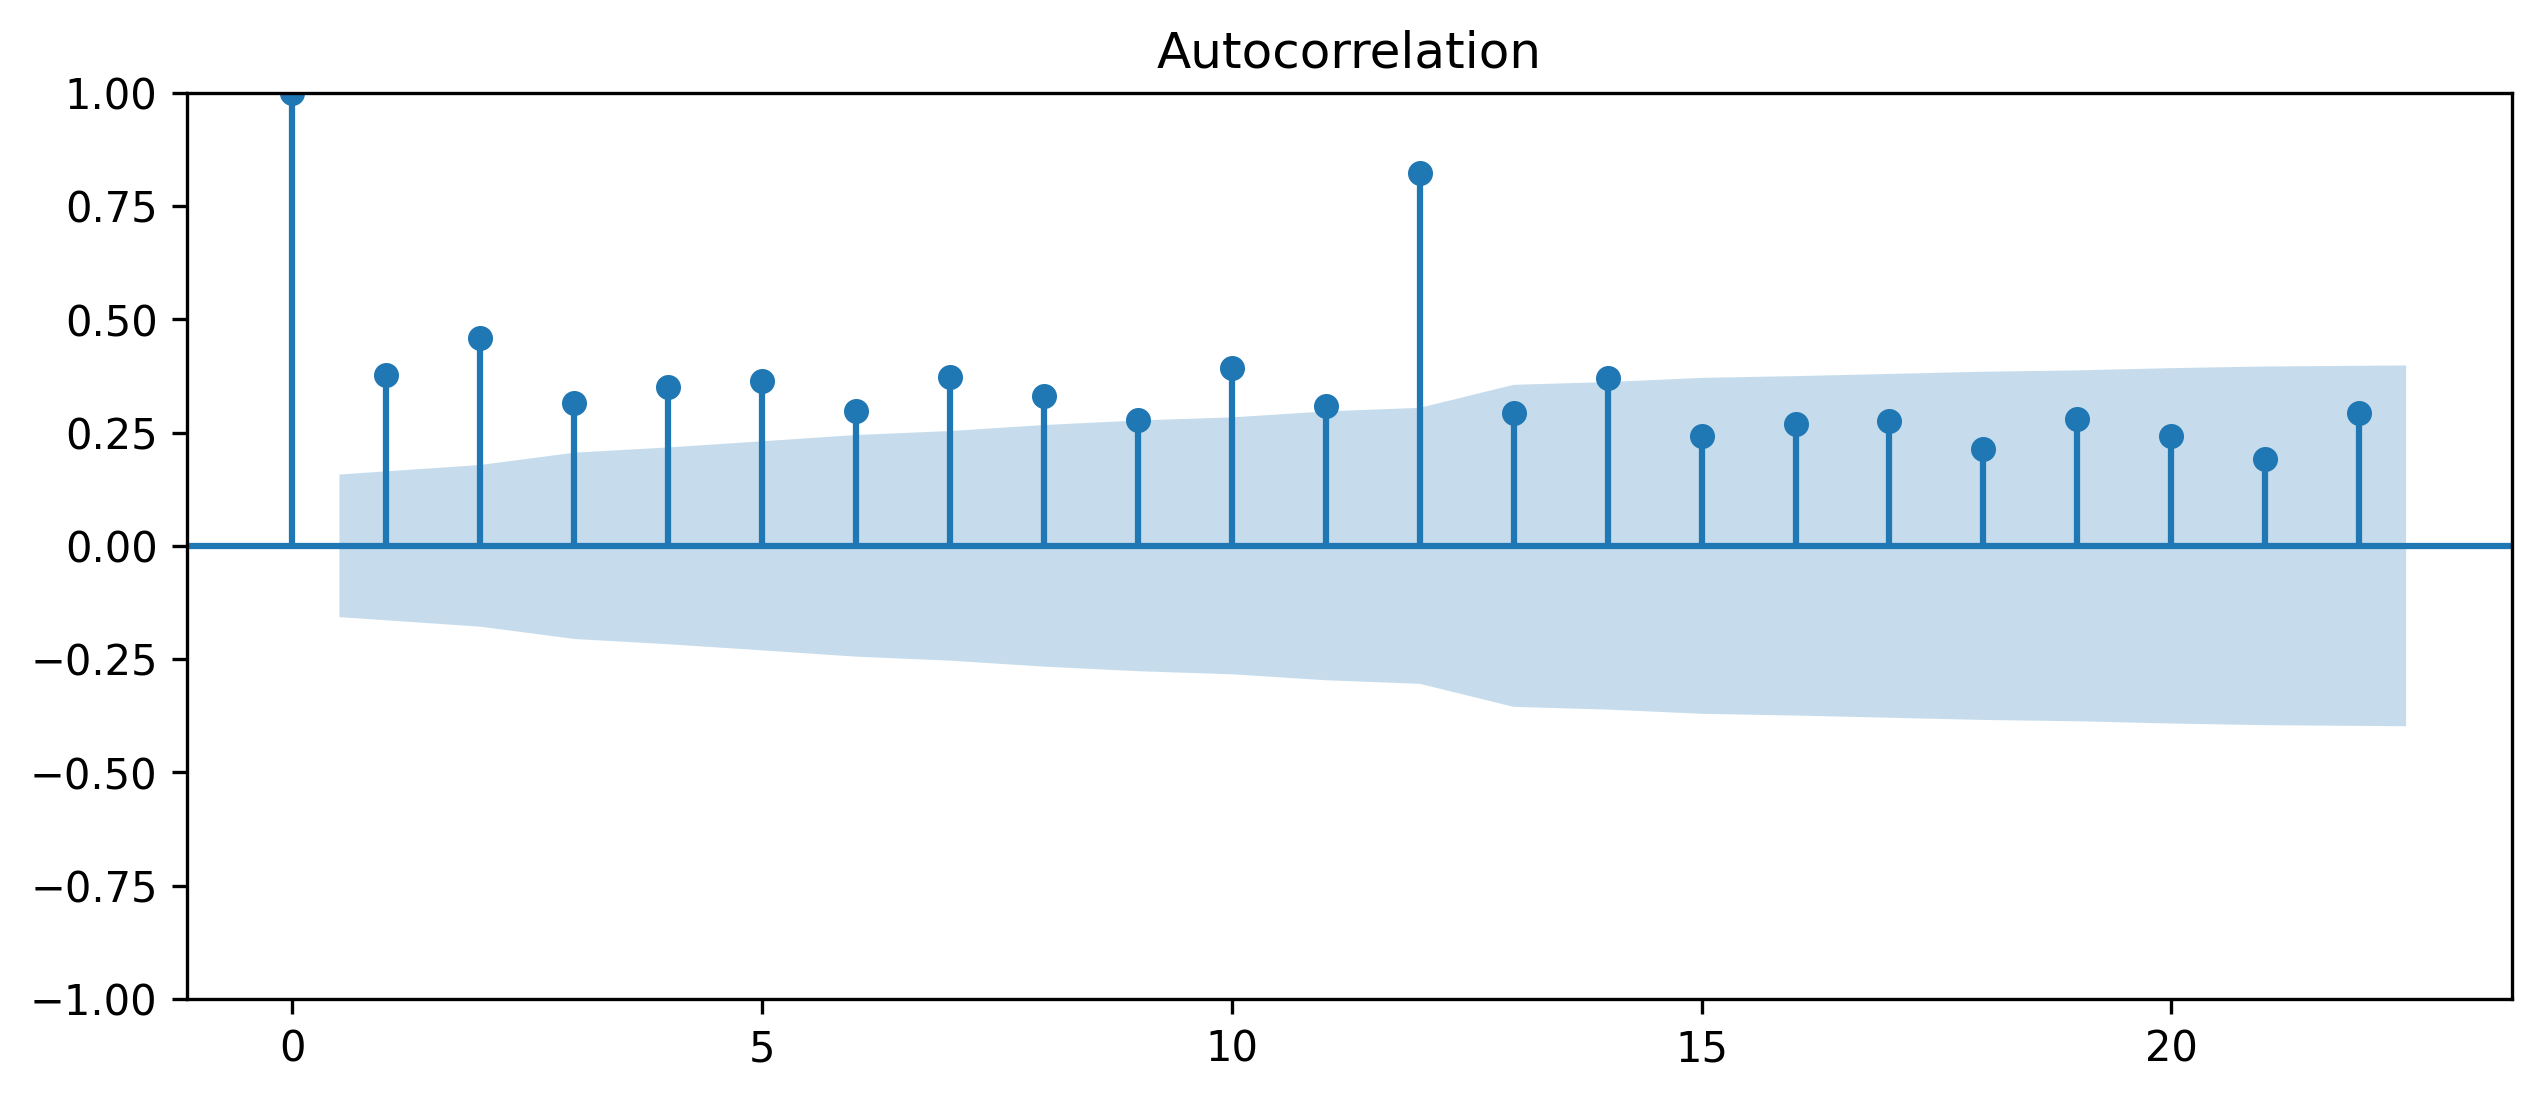

In [103]:
fig,ax=plt.subplots(figsize=(10,4),dpi=300)
plot_acf(origin_earning['total_earning'],ax=ax)
plt.show()

/home/frank/miniconda3/envs/mypy/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



<function matplotlib.pyplot.show(close=None, block=None)>

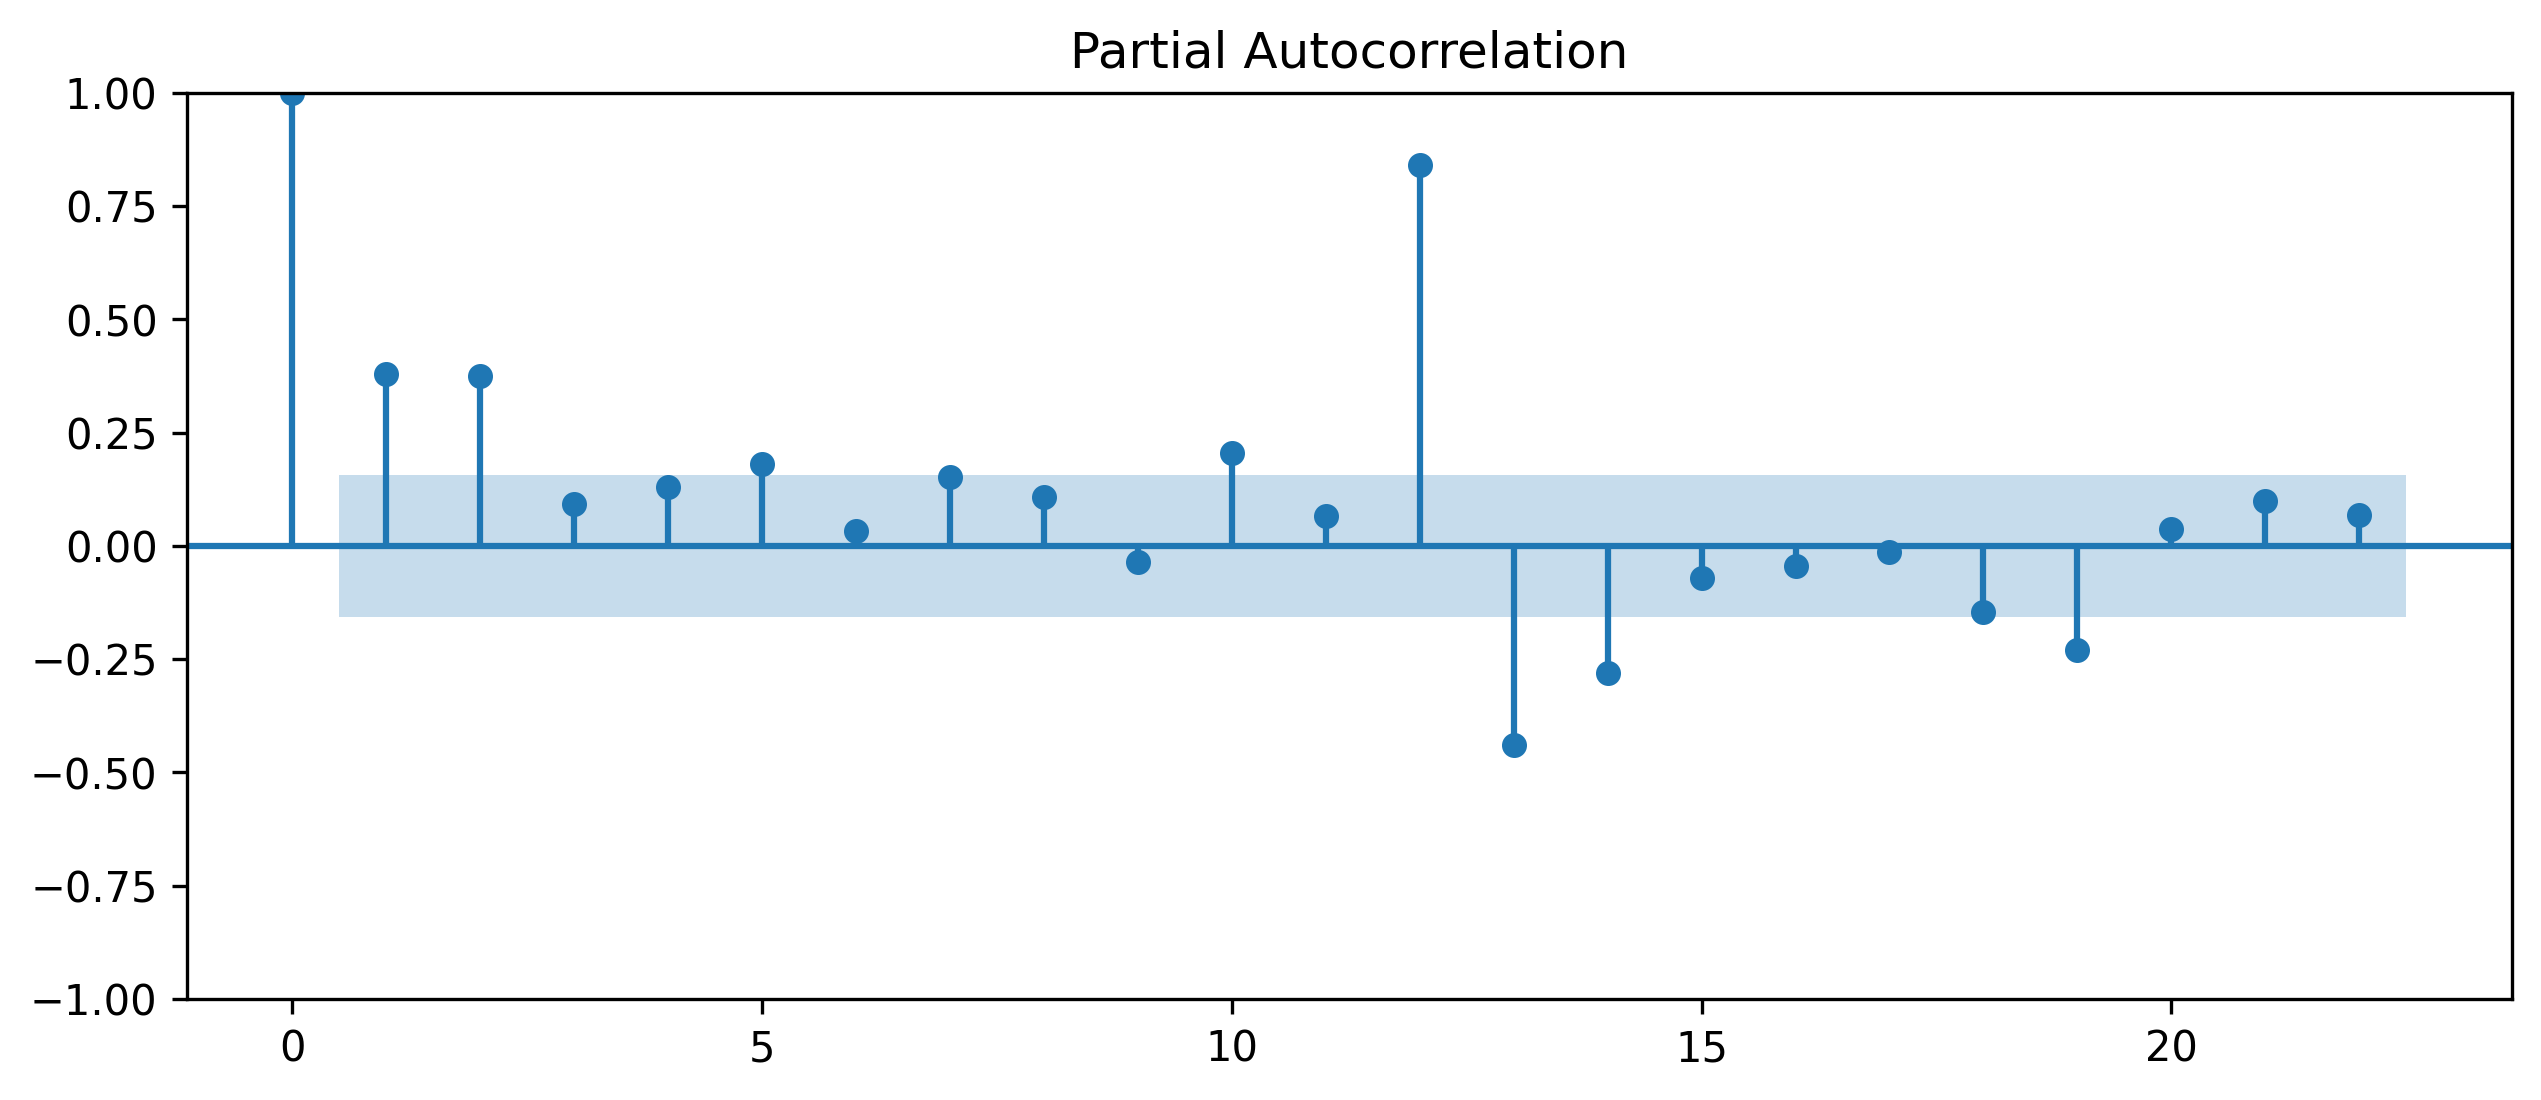

In [105]:
fig,ax=plt.subplots(figsize=(10,4),dpi=300)

plot_pacf(origin_earning['total_earning'],ax=ax)
plt.show


Text(0.5, 1.0, 'Total Earning difference')

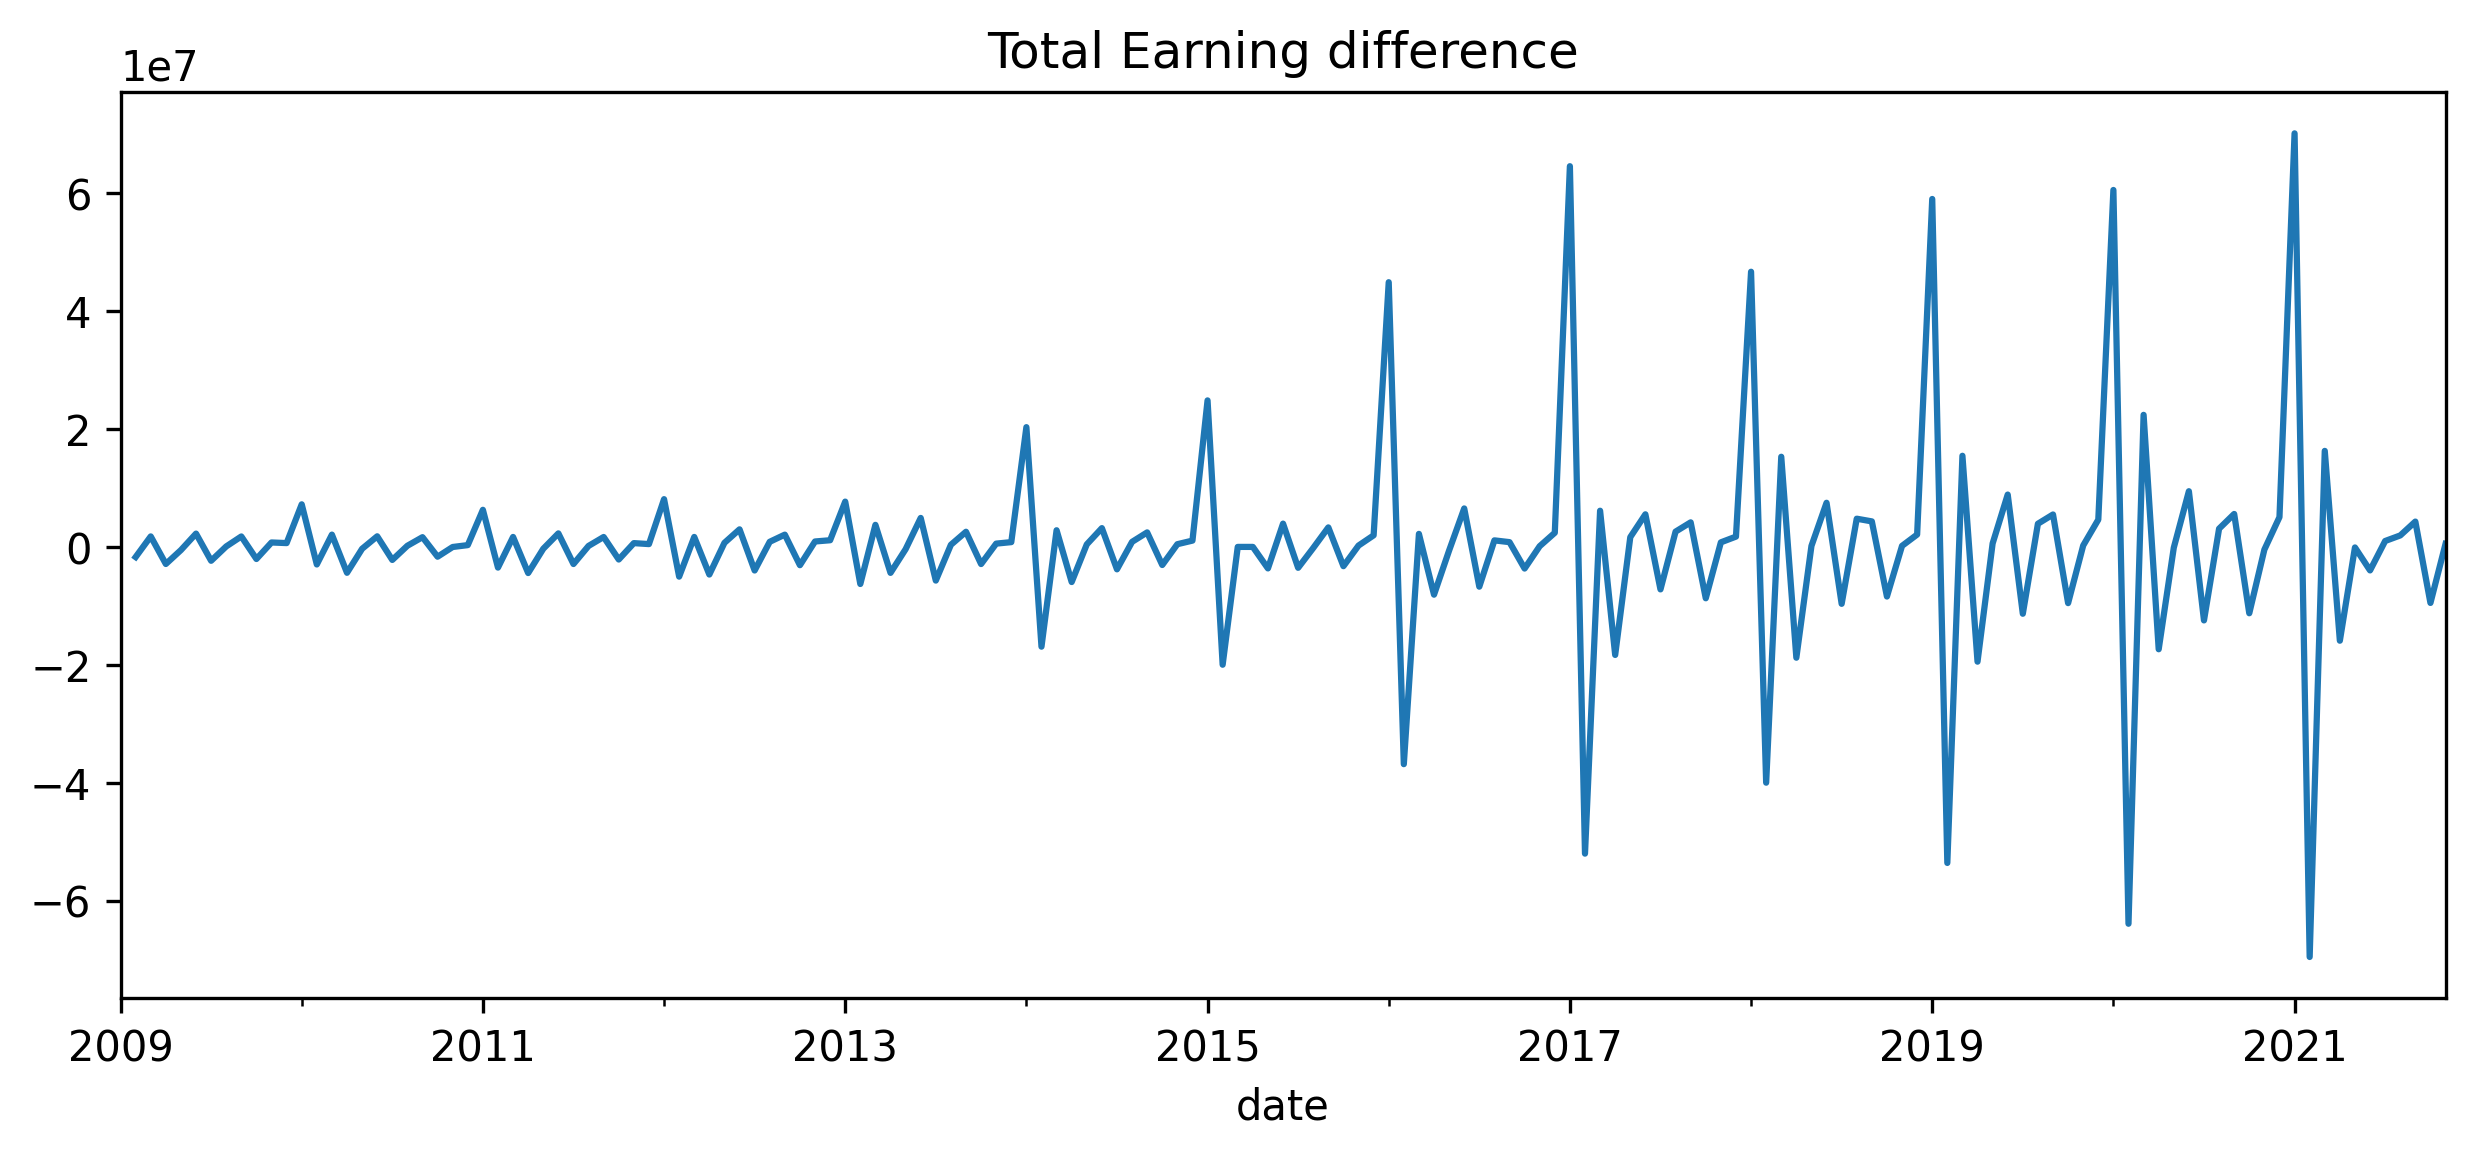

In [106]:
fig,ax=plt.subplots(figsize=(10,4),dpi=300)
(origin_earning.total_earning - origin_earning.total_earning.shift()).plot(ax=ax)
ax.set_title("Total Earning difference")

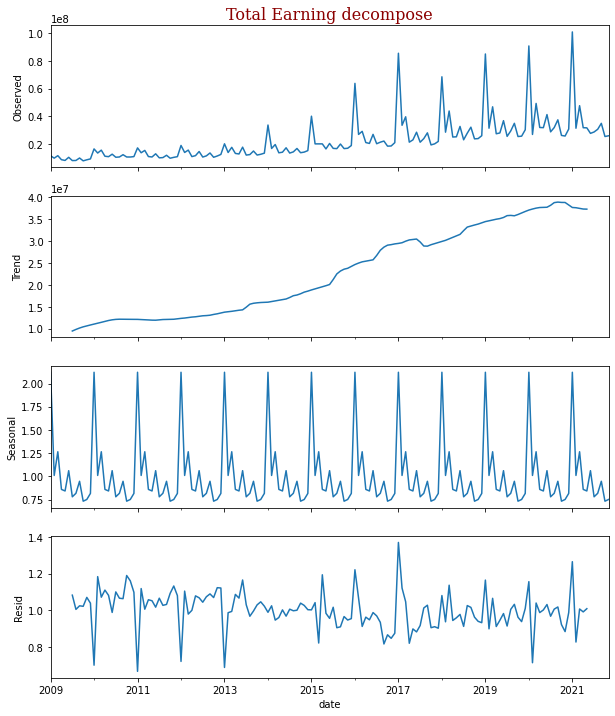

In [98]:
decomposition = seasonal_decompose(origin_earning.total_earning, model = 'multiplicative')

fig, ax = plt.subplots(ncols=1, nrows=4, figsize=(10, 12), sharex=True)
font = {'family': 'serif',
        'color': 'darkred',
        'weight': 'normal',
        'size': 16,
        }

def plot_decompose(result, ax,  title, fontdict=font):
    ax[0].set_title(title, fontdict=fontdict)
    result.observed.plot(ax=ax[0])
    ax[0].set_ylabel("Observed")

    result.trend.plot(ax=ax[1])
    ax[1].set_ylabel("Trend")

    result.seasonal.plot(ax=ax[2])
    ax[2].set_ylabel("Seasonal")

    result.resid.plot(ax=ax[3])
    ax[3].set_ylabel("Resid")

plot_decompose(result=decomposition, ax=ax, title="Total Earning decompose")
plt.show()

Text(0.5, 1.0, 'percentage change in Total Earning')

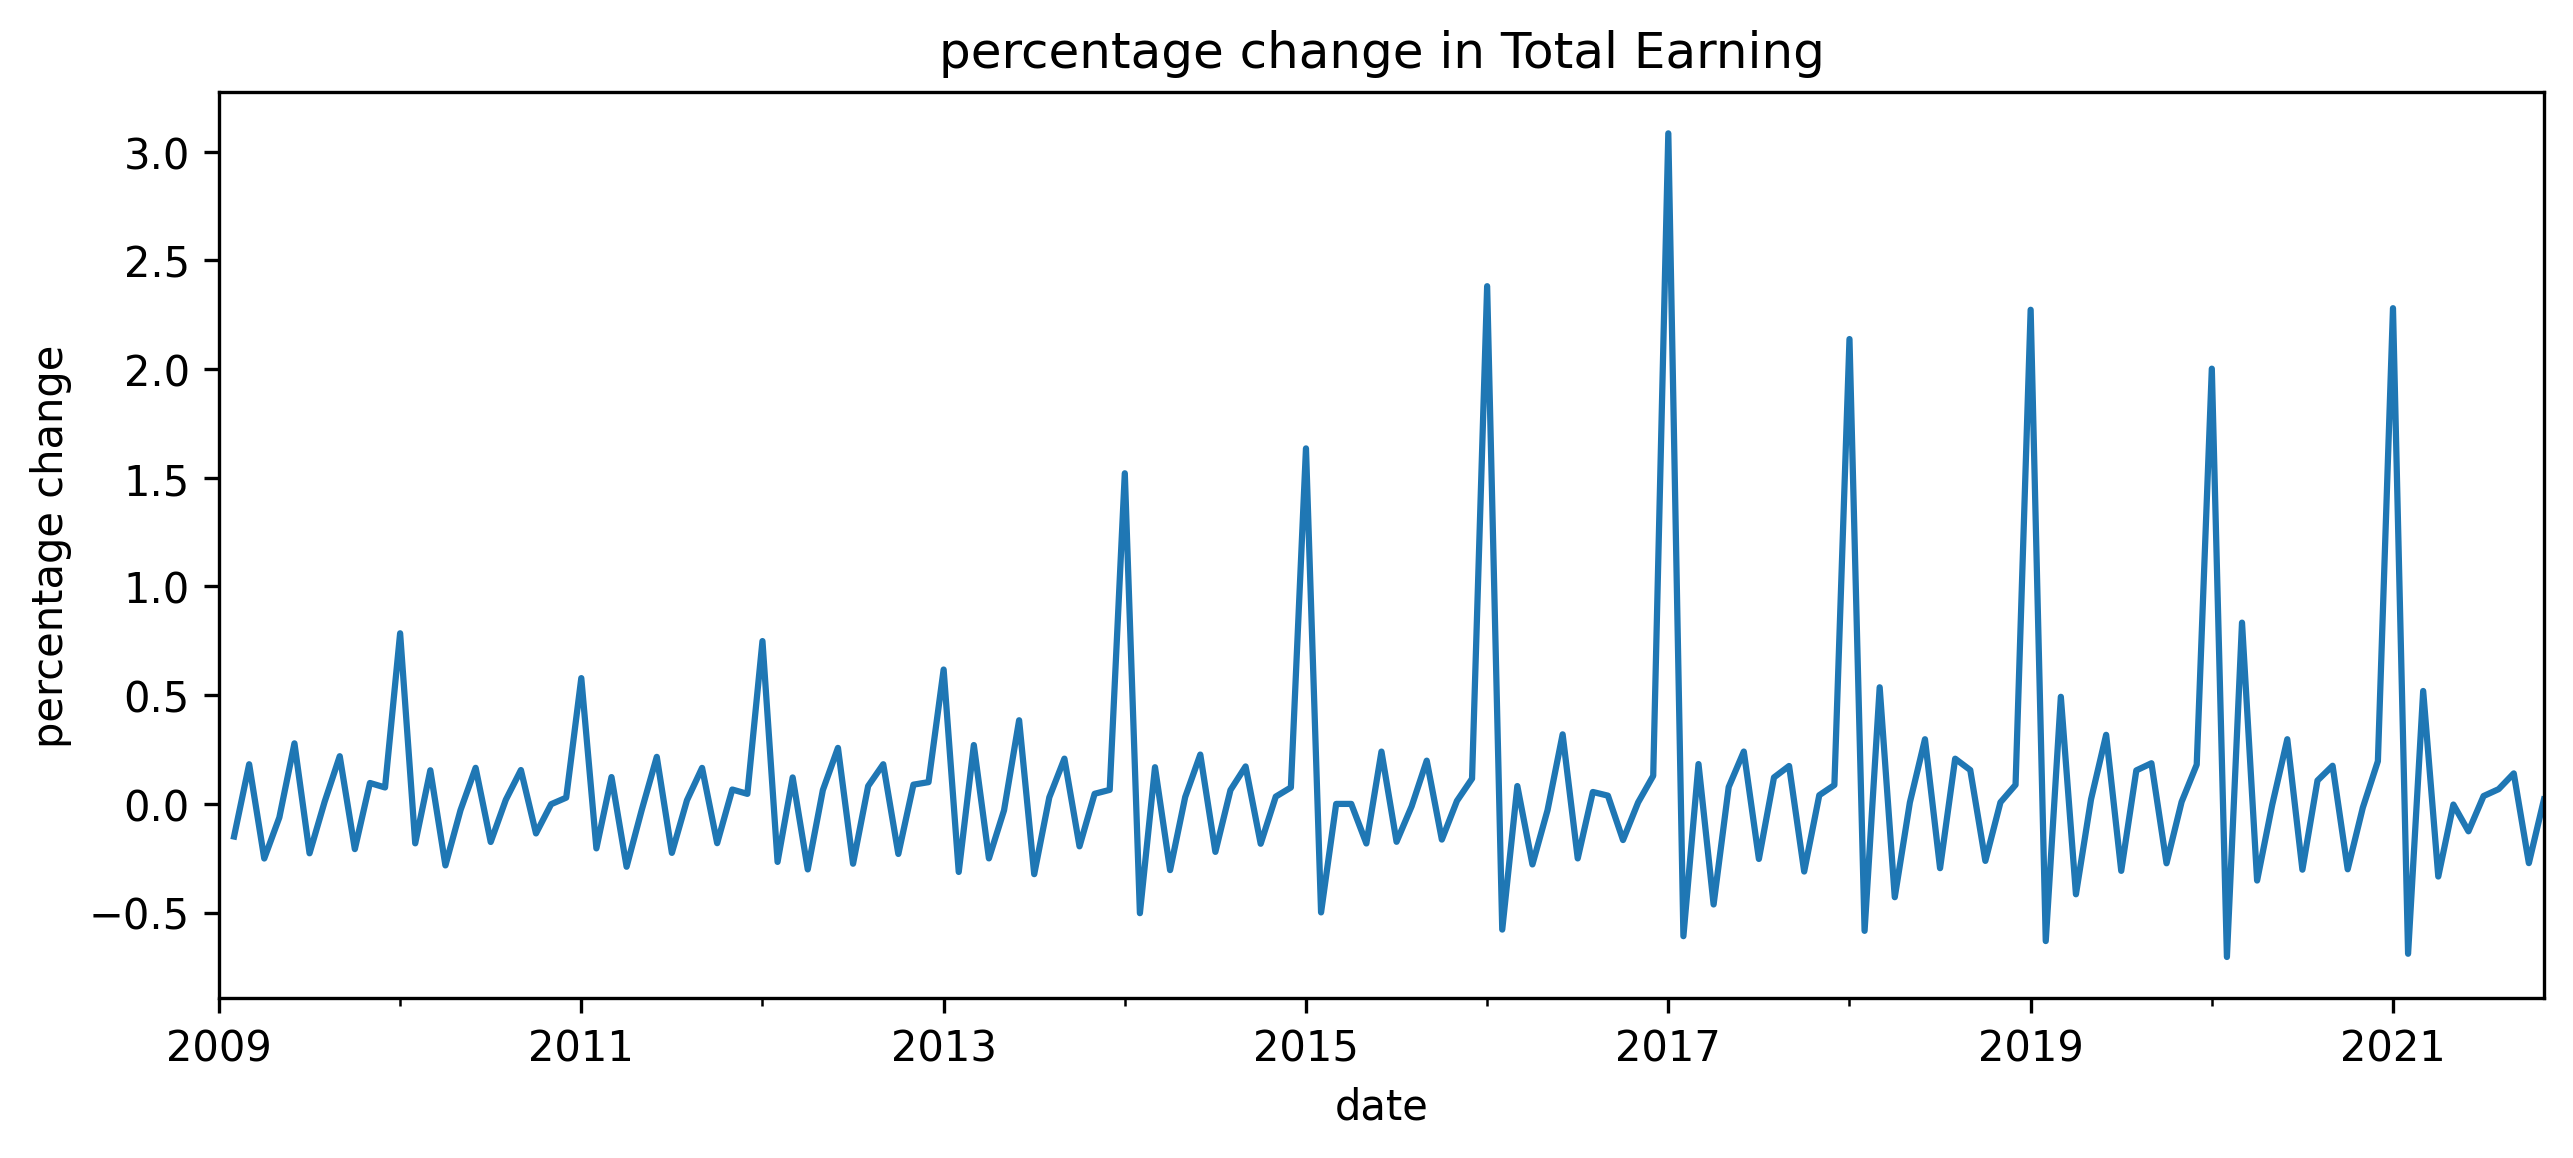

In [108]:
fig,ax=plt.subplots(figsize=(10,4),dpi=300)

origin_earning.total_earning.pct_change().plot(ax=ax)
ax.set_ylabel("percentage change")
ax.set_title("percentage change in Total Earning")

In [86]:
adfuller(origin_earning.total_earning)[1]

0.9591551348703713

Text(0.5, 1.0, 'total earnning distribution')

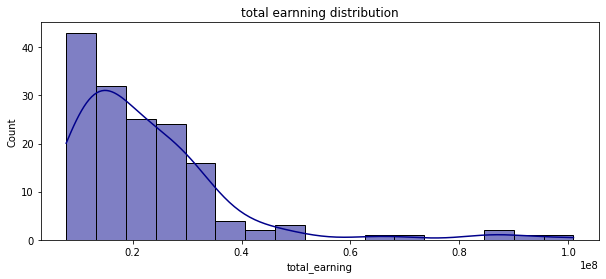

In [96]:
fig,ax=plt.subplots(figsize=(10,4))
sns.histplot(origin_earning.total_earning,kde=True,ax=ax,color='darkblue')
ax.set_title('total earnning distribution')